In [9]:
import numpy as np
from knn import KNN
from diffusion import Diffusion
from sklearn import preprocessing
from evaluate import compute_map_and_print
import pandas as pd
import scanpy as sc
import scipy.io as sio
from scipy.sparse import csr_matrix
from anndata import AnnData
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
results_file = 'data/zeisel.h5ad'  # the file that will store the analysis results

sc.settings.set_figure_params(dpi=80)

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.9 numpy==1.16.4 scipy==1.3.0 pandas==0.25.0 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [3]:
## zeisel
# filename = '/home/zydou/Projects/ncf/scdata/zeisel/Zeisel.mat'
# X = sio.loadmat(filename)['X'].toarray().astype(np.float32)
# X = np.log10(1 + X)

# adata = AnnData(X)
# adata.obs_names_make_unique()

In [3]:
filename = './data/retina.npz'
loaded = np.load(filename)
X, labels = loaded['data'], loaded['labels']
X = np.log10(1 + X)

adata = AnnData(X)
adata.obs_names_make_unique()

In [5]:
features[:50]

NameError: name 'features' is not defined

In [32]:
diffusion = Diffusion(X, 'cache')
offline = diffusion.get_offline_results(n_trunc=1000, kd=50)
offline_dense = offline.toarray()  # (19829,19829)

# use this ----------------------------------------------------
# n_cells = X.shape[0]
# n_query = 50
# features = preprocessing.normalize(offline_dense, norm="l2", axis=1)
# scores = features[:n_query] @ features[:].T
# S = csr_matrix(np.zeros((n_cells, n_cells)))
# S[:n_query] = scores

# or this -----------------------------------------------------
S = offline

adata.obs['ture_labs'] = labels
adata.uns['neighbors'] = {}
adata.uns['neighbors']['params'] = {}
adata.uns['neighbors']['params']['method'] = {}
adata.uns['neighbors']['connectivities']= S
adata.uns['neighbors']['distances'] = -S


[index] add: 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]


[cache] loading cache/offline.jbl costs 0.32s


In [9]:
sc.tl.umap(adata)

computing UMAP


/home/haotian/.conda/envs/diffusion/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 6986 separate connected components using meta-embedding (experimental)
  n_components
/home/haotian/.conda/envs/diffusion/lib/python3.7/site-packages/umap/spectral.py:154: RuntimeWarning: divide by zero encountered in true_divide
  1.0 / np.sqrt(diag_data),
/home/haotian/.conda/envs/diffusion/lib/python3.7/site-packages/umap/spectral.py:154: RuntimeWarning: divide by zero encountered in true_divide
  1.0 / np.sqrt(diag_data),


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:02:12)


running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 6988 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:03)


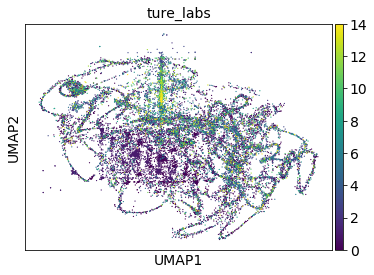

In [10]:
sc.tl.louvain(adata,resolution = 1.0)
sc.pl.umap(adata, color=['ture_labs'])

In [11]:
sc.tl.tsne(adata)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:04:19)


running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 6988 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:02)


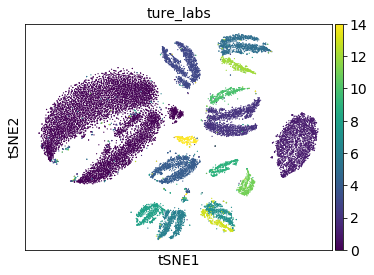

In [12]:
sc.tl.louvain(adata,resolution = 1.0)
sc.pl.tsne(adata, color=['ture_labs'])

In [13]:
adata

AnnData object with n_obs × n_vars = 19829 × 13166 
    obs: 'ture_labs', 'louvain'
    uns: 'neighbors', 'louvain'
    obsm: 'X_pca', 'X_umap', 'X_tsne'

In [14]:
diffusion = Diffusion(X, 'cache')
offline = diffusion.get_offline_results(n_trunc=1000, kd=50)
offline_dense = offline.toarray()  # (19829,19829)

# use this ----------------------------------------------------
n_cells = X.shape[0]
n_query = 50
features = preprocessing.normalize(offline_dense, norm="l2", axis=1)
scores = features[:n_query] @ features[:].T
S = csr_matrix(np.zeros((n_cells, n_cells)))
S[:n_query] = scores

adata.obs['ture_labs'] = labels
adata.uns['neighbors'] = {}
adata.uns['neighbors']['params'] = {}
adata.uns['neighbors']['params']['method'] = {}
adata.uns['neighbors']['connectivities']= S
adata.uns['neighbors']['distances'] = -S

[index] add: 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]


[cache] loading cache/offline.jbl costs 0.08s


/home/haotian/.conda/envs/diffusion/lib/python3.7/site-packages/scipy/sparse/_index.py:112: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [15]:
sc.tl.tsne(adata)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:03:19)


running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 7260 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


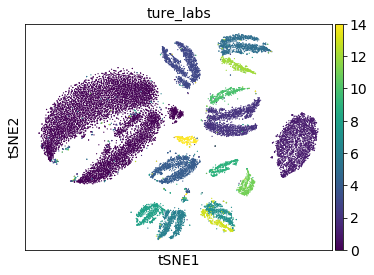

In [17]:
sc.tl.louvain(adata,resolution = 1.0)
sc.pl.tsne(adata, color=['ture_labs'])

In [21]:
adata.uns['neighbors']['connectivities'][50:].max()

50.2519

In [4]:
sc.tl.tsne(adata)


computing tSNE
         Falling back to preprocessing with `sc.pp.pca` and default params.
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 50
    finished (0:00:02)
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:03:42)


In [7]:
adata.obs['ture_labs'] = labels

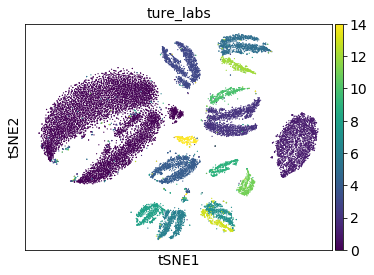

In [8]:
sc.pl.tsne(adata, color=['ture_labs'])

In [34]:
adata

AnnData object with n_obs × n_vars = 19829 × 13166 
    obs: 'ture_labs'
    uns: 'neighbors'

In [27]:
adata.obsm['X_pca'].shape

(19829, 50)

In [1]:
X

NameError: name 'X' is not defined

In [29]:
adata = AnnData(X)

In [33]:
adata.obsm['X_pca'].shape

KeyError: 'X_pca'